In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading dataset
df = pd.read_csv("D:\\ishita\\college_py\\hsb2.csv")
df.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst
0,70,0,4,1,1,1,57,52,41,47,57
1,121,1,4,2,1,3,68,59,53,63,61
2,86,0,4,3,1,1,44,33,54,58,31
3,141,0,4,3,1,3,63,44,47,53,56
4,172,0,4,2,1,2,47,52,57,53,61


In [3]:
# Checking the number of rows and columns  
num_rows, num_columns = df.shape  
print(f"Number of rows: {num_rows} (Total number of students)\nNumber of columns: {num_columns} (Student information columns)")  

Number of rows: 200 (Total number of students)
Number of columns: 11 (Student information columns)


In [4]:
# Checking for missing values
df.isnull().sum() 

id         0
Gender     0
race       0
ses        0
schtyp     0
prog       0
read       0
write      0
math       0
science    0
socst      0
dtype: int64

In [5]:
# Selecting IQ-related columns
iq_columns = ['read', 'write', 'math', 'science', 'socst']
df_iq = df[iq_columns]
df_iq.head()

,read,write,math,science,socst
0,57,52,41,47,57
1,68,59,53,63,61
2,44,33,54,58,31
3,63,44,47,53,56
4,47,52,57,53,61


In [6]:
# Standardizing the IQ variables
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_iq), columns=iq_columns)

In [7]:
# Computing distance matrices
distance_metrics = {
    'euclidean': squareform(pdist(df_std, metric='euclidean')),
    'cityblock': squareform(pdist(df_std, metric='cityblock')),
    'minkowski_3': squareform(pdist(df_std, metric='minkowski', p=3)),
    'minkowski_4': squareform(pdist(df_std, metric='minkowski', p=4))
}

In [8]:
# Creating a combined minimum distance matrix by selecting the shortest pairwise distance across all metrics
combined_distances = np.min(np.stack(list(distance_metrics.values())), axis=0)

# Sorting distances for each student using the combined minimum distance metric
distance_df = pd.DataFrame(combined_distances, index=df.index, columns=df.index)
sorted_distances_list = []
for i in range(len(df)):
    student_distances = pd.DataFrame({'Student': df.index, 'Distance': distance_df.iloc[i].values})
    student_distances = student_distances.sort_values(by='Distance')
    sorted_distances_list.append(student_distances)
sorted_distances_matrix = np.array([student_distances['Distance'].values for student_distances in sorted_distances_list])

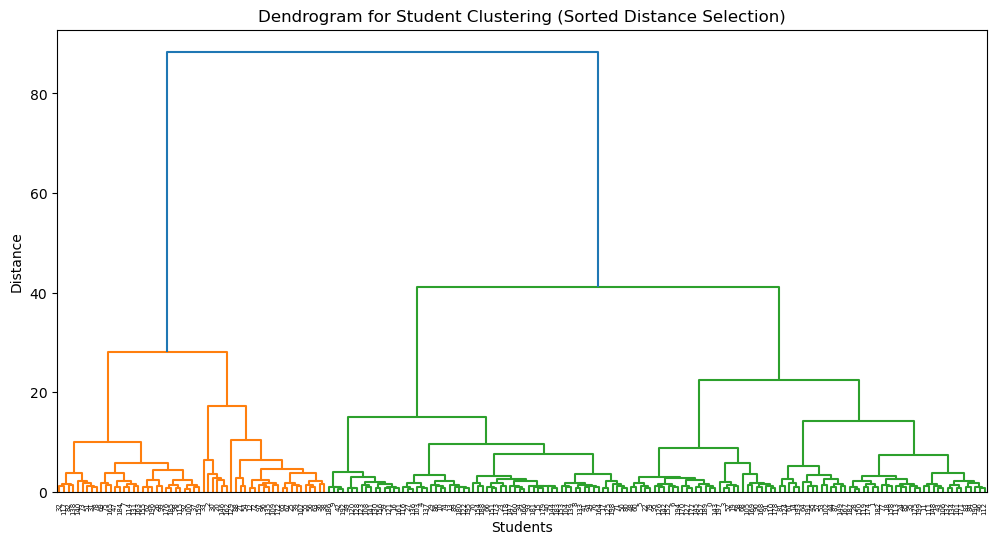

In [9]:
# Hierarchical Clustering using the sorted distances matrix
linkage_matrix = linkage(sorted_distances_matrix, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title("Dendrogram for Student Clustering (Sorted Distance Selection)")
plt.xlabel("Students")
plt.ylabel("Distance")
plt.show()

In [10]:
# Assigning clusters
num_clusters = 3
df['section'] = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

In [11]:
# Labeling sections as A, B, C
section_labels = {1: 'Sec A', 2: 'Sec B', 3: 'Sec C'}
df['section'] = df['section'].map(section_labels)

In [12]:
# Displaying the number of students in each section
section_counts = df['section'].value_counts()
print("Student count per section:\n", section_counts)

Student count per section:
 section
Sec C    77
Sec B    65
Sec A    58
Name: count, dtype: int64


In [13]:
# Creating separate DataFrames for each section
section_A = df[df['section'] == 'Sec A']
section_B = df[df['section'] == 'Sec B']
section_C = df[df['section'] == 'Sec C']

In [14]:
# Section A
section_A.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst,section
2,86,0,4,3,1,1,44,33,54,58,31,Sec A
7,11,0,1,2,1,2,34,46,45,39,36,Sec A
12,95,0,4,3,1,2,73,60,71,61,71,Sec A
20,167,0,4,2,1,1,63,49,35,66,41,Sec A
21,143,0,4,2,1,3,63,63,75,72,66,Sec A


In [15]:
# Section B
section_B.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst,section
4,172,0,4,2,1,2,47,52,57,53,61,Sec B
8,84,0,4,2,1,1,63,57,54,58,51,Sec B
9,48,0,3,2,1,2,57,55,52,50,51,Sec B
10,75,0,4,2,1,3,60,46,51,53,61,Sec B
13,104,0,4,3,1,2,54,63,57,55,46,Sec B


In [16]:
# Section C
section_C.head()

,id,Gender,race,ses,schtyp,prog,read,write,math,science,socst,section
0,70,0,4,1,1,1,57,52,41,47,57,Sec C
1,121,1,4,2,1,3,68,59,53,63,61,Sec C
3,141,0,4,3,1,3,63,44,47,53,56,Sec C
5,113,0,4,2,1,2,44,52,51,63,61,Sec C
6,50,0,3,2,1,1,50,59,42,53,61,Sec C
